<div style="background-color:#DDDDDD; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt
from scipy.constants import g as g_pesanteur

# matplotlib plot params
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 20
plt.rcParams["axes.grid"] = True

# Trajectoire d'une balle de baseball

##### Germain Salvato-Vallverdu [germain.vallverdu@univ-pau.fr](germain.vallverdu@univ-pau.fr)

Ce notebook présente la résolution du principe fondamental de la dynamique (seconde loi de Newton) appliqué au calcul de la trajectoire d'une balle de Baseball.

## Système et conditions initiales

Soit un système de masse $m$ dans un référentiel terrestre $\mathcal{R}$, supposé galilléen. 

Le système est initialement placé à une hauteur $h_o$ et lancé avec une vitesse $\vec{v}_o$ de coordonnées $(v_x, v_y, v_z)$. On choisit le repère $(Oxyz)$, lié au référentiel $\mathcal{R}$ de sorte que le système évolue dans le plan $(0xz)$.

Dans la suite on considère une balle de baseball de masse 145 g. La vitesse initiale au moment de la frappe est de 44.7 m.s$^{-1}$ avec un angle par rapport à l'horizontale de 45°. On considère que la balle est frappé à une altitude $z_o$ = 0 m.

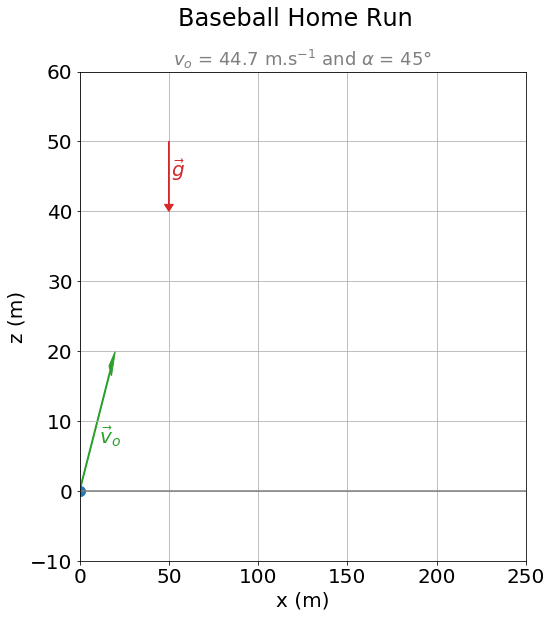

In [3]:
plt.figure(figsize=(8, 9))
plt.plot(0, "o", markersize=10)

plt.xlabel("x (m)")
plt.ylabel("z (m)")

# g
plt.arrow(50, 50, 0, -10, color="C3", zorder=2, width=0.4,
          length_includes_head=True, head_length=1, head_width=5)
plt.text(51, 45, r"$\vec{g}$", color="C3", ha="left");

# vo
plt.arrow(0, 0, 20, 20, width=0.4, color="C2",
         length_includes_head=True, head_length=4, head_width=2)
plt.text(17, 6, r"$\vec{v}_o$", color="C2", va="bottom", ha="center")

plt.suptitle("Baseball Home Run")
plt.title(r"$v_o$ = 44.7 m.s$^{-1}$ and $\alpha$ = 45°", color="C7", fontsize=18)
plt.xlim(0, 250)
plt.ylim(-10, 60)
plt.axhline(color="C7")
plt.savefig("../slides/img/baseball0.png", dpi=300)

----

## Chute libre

On suppose que le système n'est soumis qu'à la force de pesanteur $\vec{P} = m\vec{g}$, verticale, dirigée vers le centre de la terre. D'après la seconde loi de Newton, on a donc $\vec{a} = \vec{g}$. Projection sur les axes $(Ox)$ et $(Oz)$ :

\begin{equation*}
\begin{cases}
    a_x  = 0 & \displaystyle\frac{dv_x}{dt}  = 0 \\
    a_z  = -g & \displaystyle\frac{dv_z}{dt}  = -g 
\end{cases}
\end{equation*}

Par intégration et compte tenu des conditions initiales on obtient :

\begin{align*}
\begin{cases}
    \displaystyle v_x(t)  = v_{xo} \\
    \displaystyle v_z(t)  = -g t +  v_{zo}
\end{cases}
& \qquad
\begin{cases}
    \displaystyle x(t) = v_{xo}t + x_o\\
    \displaystyle z(t) = -g \frac{t^2}{2} + v_{zo} t + z_o \\
\end{cases}
\end{align*}

On en déduit l'équation de la trajectoire, avec $\alpha$ l'angle entre la vitesse initiale et l'axe $(Ox)$. En posant $x_o = 0$, on obtient :

$$z = -\frac{gx^2}{2v_o^2\cos^2\alpha} + x \tan\alpha + z_o$$

Écrivons une fonction qui retourne la valeur de $z$ à partir de la valeur de $x$ et des conditions initiales.

In [4]:
def traj_chute_libre(x, vo, alpha, zo):
    """ 
    Calcule la trajectoire d'un projectile dans le cas d'une chute libre.
    """
    return - g_pesanteur * x**2 / (2 * vo**2 * np.cos(alpha)**2) + x * np.tan(alpha) + zo

### Représentation graphique

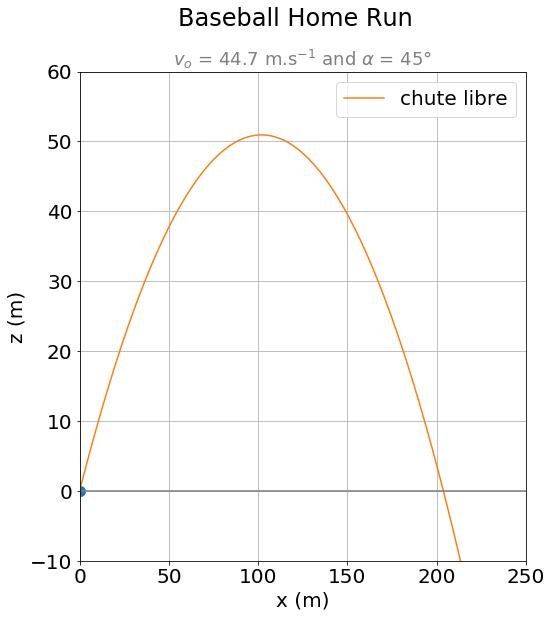

In [5]:
# conditions initiales
zo = 0
vo = 44.7
alpha = np.radians(45)

# graphique
plt.figure(figsize=(8, 9))
plt.plot(0, "o", markersize=10)

plt.xlabel("x (m)")
plt.ylabel("z (m)")

# trajectoire chute libre
x = np.linspace(0, 250, 1000)
z = traj_chute_libre(x, vo, alpha, zo)
plt.plot(x, z, label="chute libre")

plt.suptitle("Baseball Home Run")
plt.title(r"$v_o$ = 44.7 m.s$^{-1}$ and $\alpha$ = 45°", color="C7", fontsize=18)
plt.xlim(0, 250)
plt.ylim(-10, 60)
plt.axhline(color="C7")
plt.legend()
plt.savefig("../slides/img/baseball1.png", dpi=300)

---

## Prise en compte des frottements fluides

Pour prendre en compte la présence de l'air il faut modéliser les frottements entre l'air et la balle de baseball. Cela se fait en ajoutant à notre modèle une force de traînée $\vec{F}_T$.

On peut également ajouter la poussée d'archimède $\vec{\Pi} = -\rho V \vec{g}$ qui prend en compte la différence de pression autour de l'objet. Dans le cas d'une balle de baseball, elle est négligeable, elle est simplement prise en compte ici pour illustrer un cas avec plusieurs forces.

### Modèles de force de traînée

Le modèle de la force de traînée dépend du type d'écoulement. Ici l'écoulement considéré est celui de l'air autour de la balle de baseball. En mécanique des fluides le type d'écoulement est caractérisé par le nombre de Reynolds (sans unité) :

$$R_e = \frac{v L \rho}{\eta}$$

avec $v$ la vitesse caractéristique de l'écoulement, $L$ une grandeur caractéristique, $\rho$ la masse volumique du fluide et $\eta$ la viscosité dynamique du fluide. 

Il existe plusieurs modèles pour la force de traînée en fonction de la valeur du nombre de Reynolds :

* écoulement de Stockes, $R_e << 1$ : $\vec{F}_T = -k\vec{v}$ avec $k = 3\pi \eta D$
* écoulement turbulent, $R_e > 2000$ : $F_T = \frac{1}{2} \rho A C_x v^2$
* écoulement laminaires, $R_e < 2000$ assez peu fréquent. $C_x = 24 / R_e$

Avec D, le diamètre de l'objet et $C_x$ le coefficient de traînée qui peut être empiriquement calculé comme une fonction du nombre de Reynolds. Pour un écoulement turbulent ce coefficient tend vers une constante qui ne dépend que de la forme de l'objet. A est l'aire de la section de l'objet.

Pour une balle de baseball, dans l'air à 300 K et pression atmosphérique standard :

In [6]:
m = 145e-3      # masse en kg
D = 7.5e-2      # diamètre en m
rho = 1.177     # masse volumique de l'air à 300 K et 1 bar en kg.m-3
eta = 1.85e-5   # viscosité dynamique de l'air à 300 K et 1 bar en kg.m-1.s-1
v = 44.7        # vitesse en m.s-1

Re = v * D * rho / eta
print(f"Nombre de Reynolds, Re = {Re:.3e}")

Nombre de Reynolds, Re = 2.133e+05


Le mouvement de la balle de baseball est dans le cas d'un écoulement turbulent.

### Cas d'un écoulement de Stockes

Bien que le mouvement de la balle de baseball soit dans le cas d'un écoulement turbulent, commençons par le cas d'un écoulement de stockes pour lequel l'expression de la force de traînée est simple et un traitement analytique est encore possible.

La seconde loi de Newton s'écrit :
\begin{equation*}
    m\vec{a}  = \vec{P} + \vec{F}_T = m\vec{g} -k \vec{v}
\end{equation*}

La résolution nécessite d'intégrer 2 équations différentielles (une sur x et une sur z) :
\begin{equation*}
    \begin{cases}
        a_x & = \displaystyle -\frac{k}{m} v_x  \qquad \\
        a_z & = \displaystyle -g - \frac{k}{m} v_z  
    \end{cases}
    \qquad
    \begin{cases}
        \displaystyle \frac{dv_x}{dt} + \frac{k}{m} v_x & = 0 \qquad\\
        \displaystyle \frac{dv_z}{dt} + \frac{k}{m} v_z & = -g 
    \end{cases}
\end{equation*}

Ce qui donne les équations suivantes:
\begin{equation*}
    \begin{cases}
        \displaystyle x(t) & = \displaystyle \frac{m}{k} v_x^{(o)} \left(1-\exp\left(-\frac {k}{m}t\right)\right) \qquad \\
        \displaystyle z(t) & = \displaystyle - \frac{mg}{k} t + \frac{m}{k}\left(v_y^{(o)}+ \frac {mg}{k}\right)\left(1-\exp\left(-\frac {k}{m}t\right)\right)
    \end{cases}
\end{equation*}

Écrivons une fonction qui retourne les valeurs de $x$ et $z$ en fonction des conditions initiales :

In [7]:
def traj_stockes(t, data):
    """
    Calcule la trajectoire d'un projectile dans le cas d'une force de trainee
    F_T = - k v en fonction du temps.
    
    data contient les parametres : vitesse initiale, angle, coefficient de trainee,
    masse, 
     
    """
    vxo = data.vo * np.cos(data.alpha)
    vyo = data.vo * np.sin(data.alpha)
    
    exp = (1 - np.exp(-data.drag * t / data.m))
    m_over_k = data.m / data.drag
    
    xpos = m_over_k * vxo * exp
    zpos = -m_over_k * g_pesanteur * t + m_over_k * (vyo + m_over_k * g_pesanteur) * exp
    
    return xpos, zpos

Créons un conteneur pour les paramètres de la trajectoire : 
* vitesse initiale `vo`
* angle avec l'horizontale `alpha`
* masse `m`
* coefficient de traînée `drag`

In [8]:
StockesData = namedtuple("StockesData", "vo alpha m drag")
data_stockes = StockesData(vo=44.7, alpha=np.radians(45), m=0.145, drag=0.0431)

#### Représentation graphique

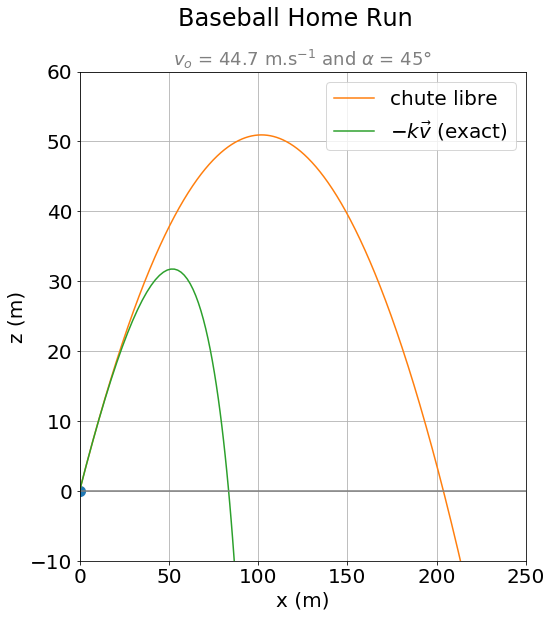

In [9]:
plt.figure(figsize=(8, 9))
plt.plot(0, "o", markersize=10)

plt.xlabel("x (m)")
plt.ylabel("z (m)")

# trajectoire chute libre
#    conditions initiales
zo = 0
vo = 44.7
alpha = np.radians(45)
#    trajectoire
x = np.linspace(0, 250, 1000)
z = traj_chute_libre(x, vo, alpha, zo)
plt.plot(x, z, label= "chute libre")

# stockes exact
t = np.linspace(0, 6, 50)
xs, zs = traj_stockes(t, data_stockes)
plt.plot(xs, zs, label=r"$-k\vec{v}$ (exact)")

plt.suptitle("Baseball Home Run")
plt.title(r"$v_o$ = 44.7 m.s$^{-1}$ and $\alpha$ = 45°", color="C7", fontsize=18)
plt.xlim(0, 250)
plt.ylim(-10, 60)
plt.axhline(color="C7")
plt.legend(loc="upper right");
plt.savefig("../slides/img/baseball2.png", dpi=300)

### Écoulement turbulent

Prennons maintenant en compte une force de traînée proportionnelle au carré de la vitesse et la poussée d'archimède. La seconde loi de Newton s'écrit:

\begin{align*}
    m\vec{a} & = \vec{P} + \vec{\Pi} + \vec{F}_T \\
    \vec{a} & = \vec{g} - \frac{\rho V}{m} \vec{g} - \frac{\rho S C_x v^2}{2m}   \frac{\vec{v}}{v} \\
\end{align*}

Projection sur les axes $(Ox)$ et $(Oz)$ :

\begin{equation*}
    \begin{cases}
        \displaystyle a_x = \frac{dv_x}{dt} =  -\frac{\rho S C_x}{2m} v \, v_x \\
        \displaystyle a_z = \frac{dv_z}{dt} = -g + \frac{\rho V g}{m} - \frac{\rho S C_x}{2m} v \, v_y 
    \end{cases}
\end{equation*}

Pour résoudre les équations ci-dessous, nous allons mettre en œuvre une approche numérique.

---

## Résolution numérique

L'approche la plus simple pour intégrer les équations du mouvement consiste à une discrétistaion du temps par la méthode d'Euler en faisant un développement de Taylor à l'ordre un. Pour la vitesse on obtient:

\begin{align*}
    v_x(t + \delta t) & = v_x(t) + \frac{dv_x}{dt} \delta t + \mathcal{O}(\delta t^2) 
    = v_x(t) + a_x(t) \delta t  + \mathcal{O}(\delta t^2) \\
    v_z(t + \delta t) & = v_z(t) + \frac{dv_z}{dt} \delta t + \mathcal{O}(\delta t^2)
    = v_z(t) + a_z(t) \delta t  + \mathcal{O}(\delta t^2) \\
\end{align*}

Pour la position :

\begin{align*}
    x(t + \delta t) & = x(t) + \frac{dx}{dt} \delta t + \mathcal{O}(\delta t^2)
    = x(t) + v_x(t) \delta t + \mathcal{O}(\delta t^2)\\
    z(t + \delta t) & = z(t) + \frac{dz}{dt} \delta t + \mathcal{O}(\delta t^2) 
    = z(t) + v_z(t) \delta t + \mathcal{O}(\delta t^2)\\
\end{align*}

Connaissant la vitesse et la position au temps t, on peut donc les calculer au temps $t+\delta t$.

Pour calculer la trajectoire, on peut mettre en place un processus d'intégration itératif en procèdant de la façon suivante, à chaque pas de temps :
1. Calcul des forces $F$
2. mise à jour des vitesses : $v(t+\delta t) = v(t) + \displaystyle\frac{F}{m} \delta t$
3. mise à jour des positions : $x(t + \delta t) = x(t) + v(t) \delta t$

Définissons des fonctions qui calculent les forces dans le cas d'une force de traînée associée à un écoulement de stockes et à un écoulement turbulent.

In [10]:
def forces_stockes(v, data):
    """ 
    Calcule les forces dans le cas d'une force de trainee de type F_T = -kv
    """
    f_x = - data.drag / data.m * v[0]
    f_z = - g_pesanteur - data.drag / data.m * v[1]

    return np.array([f_x, f_z])

In [11]:
def forces_turbulent(v, data):
    """
    Calcule les forces dans le cas d'une force de trainee de type 
    F_T = - rho S C_x v^2 / 2 
    """
    # aire
    area = np.pi * (data.D / 2)**2
    volume = 4 * np.pi * (data.D / 2)**3 / 3
    drag = data.rho * area * data.c_x / (2 * data.m)

    v_norm = np.sqrt(sum(v**2))
    f_x = - drag * v[0] * v_norm
    f_z = - g_pesanteur + data.rho * volume * g_pesanteur / data.m - drag * v[1] * v_norm
    
    return np.array([f_x, f_z])

**Remarque :** Il est plus habituel que les forces dépendent des positions plutôt que des vitesses, notament lorsqu'il s'agit de forces conservatives. Dans les exemples présentés ici, la seule force conservative (le poids) est supposée indépendante de la position et donc constante le long de la trajectoire. Les fonctions dépendent donc des vitesses pour calculer les forces de traînée.

Définissons maintenant une fonction qui réalise une simulation et calcule une trajectoire. Cette fonction a besoin du nombre de pas de la simulation, du pas d'intégration $\delta t$ et d'une fonction qui calcule les forces.

In [12]:
def simulation(nstep, dt, f_forces, data):
    """
    Compute the trajectory of a given object using the given forces.
    All needed data have to be defined in the data container.
    
    Args:
        nstep (int): number of steps
        dt (float): time step integration
        f_forces (function): A function that compute the forces
        data (container): A container in order to compute the forces
    """
    
    # initial conditions
    positions = np.zeros((nstep, 2))
    velocities = np.zeros((nstep, 2))
    positions[0] = [0, 0]
    velocities[0] = [data.vo * np.cos(data.alpha), 
                     data.vo * np.sin(data.alpha)]

    # run
    for step in range(1, nstep):
        # compute forces
        forces = f_forces(velocities[step - 1], data)

        # update velocities
        velocities[step] = velocities[step - 1] + forces * dt
        
        # update positions
        positions[step] = positions[step - 1] + velocities[step] * dt

    return positions, velocities

### Retour sur l'écoulement de Stockes

Avant d'étudier la trajectoire dans le cas d'un écoulement turbulent, commençons par comparer la trajectoire que l'on obtient par intégration numérique avec la trajectoire obtenue par la résolution analytique. En particulier on regarde l'effet du pas d'intégration $\delta t$.

#### Représentation graphique

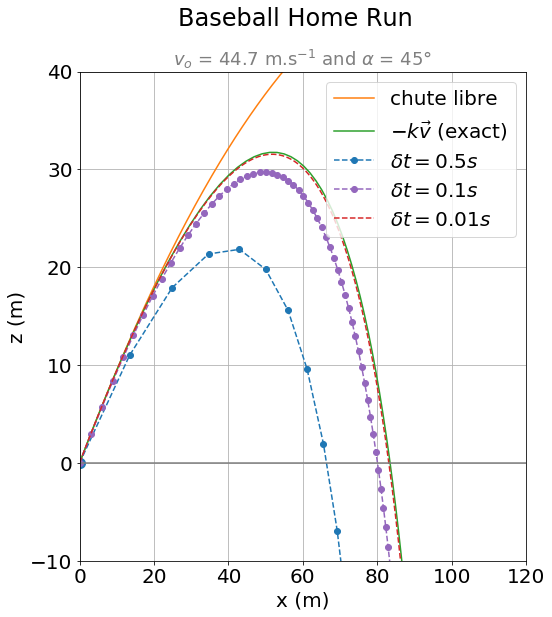

In [13]:
plt.figure(figsize=(8, 9))
plt.plot(0, "o", markersize=10)

plt.xlabel("x (m)")
plt.ylabel("z (m)")

# trajectoire chute libre
#    conditions initiales
zo = 0
vo = 44.7
alpha = np.radians(45)
#    trajectoire
x = np.linspace(0, 250, 1000)
z = traj_chute_libre(x, vo, alpha, zo)
plt.plot(x, z, label= "chute libre")

# stockes exact trajectory
data_stockes = StockesData(vo=44.7, alpha=np.radians(45), 
                           m=0.145, drag=0.0431)
t = np.linspace(0, 6, 50)
xs, zs = traj_stockes(t, data_stockes)
plt.plot(xs, zs, label=r"$-k\vec{v}$ (exact)")

# numerical integration
positions, vitesses = simulation(nstep=20, dt=.5, f_forces=forces_stockes, 
                                 data=data_stockes)
plt.plot(positions[:, 0], positions[:, 1], "o", linestyle="--", 
         color="C0", label=r"$\delta t = 0.5 s$")

positions, vitesses = simulation(nstep=100, dt=.1, f_forces=forces_stockes, 
                                 data=data_stockes)
plt.plot(positions[:, 0], positions[:, 1], "o", linestyle="--", 
         color="C4", label=r"$\delta t = 0.1 s$")

positions, vitesses = simulation(nstep=1000, dt=.01, f_forces=forces_stockes, 
                                 data=data_stockes)
plt.plot(positions[:, 0], positions[:, 1], linestyle="--", 
         color="C3", label=r"$\delta t = 0.01 s$")

plt.suptitle("Baseball Home Run")
plt.title(r"$v_o$ = 44.7 m.s$^{-1}$ and $\alpha$ = 45°", color="C7", fontsize=18)
plt.xlim(0, 120)
plt.ylim(-10, 40)
plt.axhline(color="C7")
plt.legend(loc="upper right");
plt.savefig("../slides/img/baseball4.png", dpi=300)

### Cas turbulent

Étudions maintenant la trajectoire en utilisant une force de traînée correspondant à un écoulement turbulent. On commence par définir les paramètres de la simulation : conditions initiales et paramètres de la force de traînée.

In [14]:
DataTurbulent = namedtuple("DataTurbulent", "vo alpha m D rho eta c_x")
data_turb = DataTurbulent(
    # initial velocity
    vo=44.7,       # m.s-1
    # angle of initial velocity
    alpha=np.radians(45), 
    # baseball ball mass
    m=145e-3,      # kg
    # ball diameter
    D=75e-3,     # m
    # air density at 300K
    rho=1.177,     # kg.m-3
    # dynamic viscosity at 300K
    eta=1.85e-5,   # kg.m-1.s-1
    # drag coefficient
    c_x=0.6,       # sphere
)

#### Représentation graphique

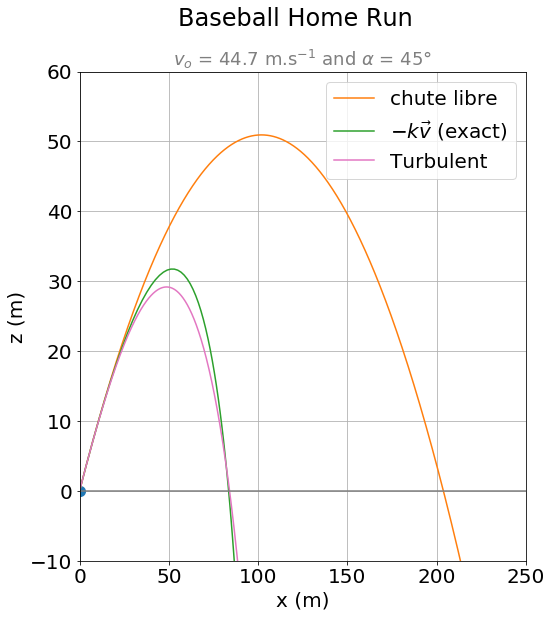

In [15]:
plt.figure(figsize=(8, 9))
plt.plot(0, "o", markersize=10)

plt.xlabel("x (m)")
plt.ylabel("z (m)")

# trajectoire chute libre
#    conditions initiales
zo = 0
vo = 44.7
alpha = np.radians(45)
#    trajectoire
x = np.linspace(0, 250, 1000)
z = traj_chute_libre(x, vo, alpha, zo)
plt.plot(x, z, label= "chute libre")

# stockes exact trajectory
data_stockes = StockesData(vo=44.7, alpha=np.radians(45), 
                           m=0.145, drag=0.0431)
t = np.linspace(0, 6, 50)
xs, zs = traj_stockes(t, data_stockes)
plt.plot(xs, zs, label=r"$-k\vec{v}$ (exact)")

# numerical integration
positions, vitesses = simulation(nstep=1000, dt=0.01, f_forces=forces_turbulent, 
                                 data=data_turb)
plt.plot(positions[:, 0], positions[:, 1], color="C6", label="Turbulent")

plt.suptitle("Baseball Home Run")
plt.title(r"$v_o$ = 44.7 m.s$^{-1}$ and $\alpha$ = 45°", color="C7", fontsize=18)
plt.xlim(0, 250)
plt.ylim(-10, 60)
plt.axhline(color="C7")
plt.legend(loc="upper right");
plt.savefig("../slides/img/baseball3.png", dpi=300)

---

## Conclusion

Ce notebook présente la résolution d'un problème assez classique de balistique. Une approche analytique est envisagé dans le cas d'une chute libre et d'une force de frottements simple. Un traitement numérique et ensuite mis en œuvre pour un modèle de force de traînée plus complexe.

Cette étude permet d'illustrer :
* La notion de modèle, sa validation et les limites d'applications
* L'utilisation d'une approche numérique pour résoudre un problème de physique
* La programmation d'un algorithme
